# Отчет по индивидуальному заданию:

### «Линейный и нелинейный классификаторы Байеса. Сравнение показателей качества (точность, чувствительность, специфичность и пр. для случая двух классов)»

по предмету «Data mining».

Преподаватель: Седаков Артем Александрович

Выполнили:

Янн Александр, группа 19.Б02-ПУ

Мнацаканян Анаит, группа 19.Б02-ПУ



In [ ]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn. model_selection import RepeatedStratifiedKFold
from sklearn. model_selection import cross_val_score
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis
from sklearn. discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk

Байесовский подход к классификации основан на приниципе максимума апостериорной вероятности.

Вычислим априорные вероятности как долю объектов класса в обучающей выборке.

В нашем случае нам не известны плотности распределения для классов, поэтому сначала мы должны их восстановить. Линейный и квадратичный дискриминантный анализ, который реализован в нашем проекте требует параметрического восстановления плотности классов.

Для линейного дискриминантного анализа делается предположение о равенсвте ковариационных матриц

In [ ]:
df = pd.read_excel('/content/pm2.xlsx')
df = df.query('positions == "professor" or positions == "associate professor"')

Признаки : количество публикаций, грантов, заявок и проектов

Классы: профессор, доцент

In [ ]:
df.positions.unique()

array(['professor', 'associate professor'], dtype=object)

In [ ]:
X = df[['publications', 'applications', 'grants','projects']]
y = df['positions']

In [ ]:
X.corr()

,publications,applications,grants,projects
publications,1.000000,0.349417,0.391275,0.268556
applications,0.349417,1.000000,0.627810,0.622005
grants,0.391275,0.627810,1.000000,0.850731
projects,0.268556,0.622005,0.850731,1.000000


 Чтобы избавиться от мультиколлинеарности уберем признак "проекты"

In [ ]:
X = df[['publications', 'applications', 'grants']]
y = df['positions']

In [ ]:
X.corr()

,publications,applications,grants
publications,1.000000,0.349417,0.391275
applications,0.349417,1.000000,0.627810
grants,0.391275,0.627810,1.000000


Будем пользоваться методам LDA(линейный дискриминантный анализ) и QDA(квадратичный дискриминантный анализ) из библиотеки sklearn

In [ ]:
 modelLDA = LinearDiscriminantAnalysis(solver = 'svd')
modelLDA.fit(X, y)
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(X, y)

QuadraticDiscriminantAnalysis()

In [ ]:
modelLDA.covariance_()

AttributeError: ignored

Оценим точность моделей, используя кросс - валидацию.

Основная идея состоит в том, что мы случайный образом перемешиваем данные  и разбиваем всю нашу выборку на $k$ групп.

Каждую из $k$ групп случаным образом делим на данных для обучения и для тестирования

In [ ]:
cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats= 3)
scores = cross_val_score(modelLDA, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.6923076923076924


In [ ]:
cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats= 3)
scores = cross_val_score(modelQDA, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7031135531135533


In [ ]:
df_t = pd.DataFrame(modelLDA.predict(X) == y)
df_t.value_counts().head(1)/131

positions
True         0.694656
dtype: float64

In [ ]:
new = [67,27,34]
print(modelLDA.predict([new]))

['associate professor']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


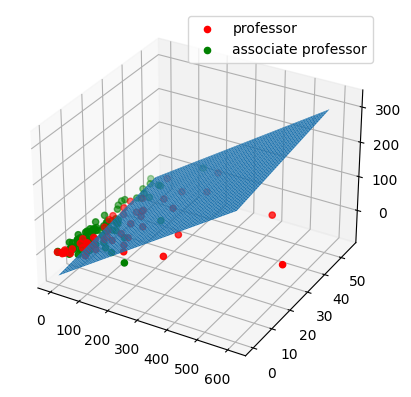

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green']
data_plot = pd.concat([X,y], axis = 1)
for color, i, target_name in zip(colors, df.positions.unique().tolist(), df.positions.unique().tolist()):
 ax.scatter(data_plot[data_plot.positions == i]['publications'].tolist(), data_plot[data_plot.positions == i]['applications'].tolist(),data_plot[data_plot.positions == i]['grants'].tolist(), color=color,
 label=target_name)
plt.legend(loc='best', shadow= False , scatterpoints=1)
u, v = np.meshgrid(np.linspace(0, 600, 1000), np.linspace(0, 50, 100))
z = u * modelLDA.coef_[0][0]/modelLDA.coef_[0][2] - v * modelLDA.coef_[0][1]/modelLDA.coef_[0][2] + modelLDA.intercept_/modelLDA.coef_[0][2]
ax.plot_surface(u, v, z)
plt.show()

In [ ]:
df_full = pd.concat([X,y],axis = 1)

In [ ]:
df_prof = df_full.query('positions == "professor"').reset_index(drop = True)

In [ ]:
df_ass = df_full.query('positions == "associate professor"').reset_index(drop = True)

In [ ]:
X_prof = df_prof[['publications','applications','grants']]
X_ass = df_ass[['publications','applications','grants']]
Tprof = sum(modelLDA.predict(X_ass) != 'associate professor')

In [ ]:
y_pred = modelLDA.predict(X)


$$
precision = \frac{TP}{TP+FP}
$$

*Точность* - доля объектов, названных положительными и при этом являющихся положительными. Позволяет избежать ситуации, когда все объекты будут относиться классификатором к одному классу, так как в этом случае растет *FP*

$$
$$

$$
specify  = \frac{TN}{TN+FP}
$$
 *Специфичность* -  доля верно классифицированных негативных объектов к общему числу негативных
 $$
 $$

 $$
recall = \frac{TP}{TP+FN}
$$
 *Полнота* - доля найденных положительных объектов класса от общего количества положительных. Чем выше значение, тем меньше положительных объектов было пропущено
 $$
 $$

$$
F_{1} = \frac{2}{1/\mathrm{precision}+1/\mathrm{recall}} = 2\frac{\mathrm{precision} \times \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{TP}{TP+\frac{FN+FP}{2}}
$$

*F-мера* - взвешенно гармоническое среднее полноты и точности. Отражает сколько случаев будет спрогнозировано верно и сколько истинных объектов классификатор не пропустит

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_pred)

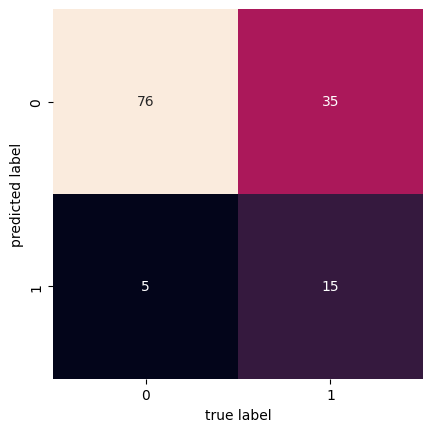

In [ ]:
import seaborn as sns
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('true label')
plt.ylabel('predicted label');

СЛУЧАЙ ЕСЛИ ПОЗИТИВ  - ПРОФЕССОР

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
rs = recall_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
f1s = f1_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
print('precision score = {}'.format(ps))
print('recall score = {}'.format(rs))
print('F1 score = {}'.format(f1s.round(2)))

precision score = 0.75
recall score = 0.3
F1 score = 0.43


In [ ]:
Tprof = mat[1][1]
Tass = mat[0][0]
Fprof = mat[0][1]
Fass = mat[1][0]

In [ ]:
#специфичность
Tass / (Tass + Fprof)

0.9382716049382716

СЛУЧАЙ ЕСЛИ ПОЗИТИВ  - ДОЦЕНТ

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
rs = recall_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
f1s = f1_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
print('precision score = {}'.format(ps))
print('recall score = {}'.format(rs))
print('F1 score = {}'.format(f1s.round(2)))

precision score = 0.6846846846846847
recall score = 0.9382716049382716
F1 score = 0.79


In [ ]:
#специфичность
Tprof / (Tprof + Fass)

0.3

QDA


In [ ]:
y_pred = modelQDA.predict(X)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_pred)

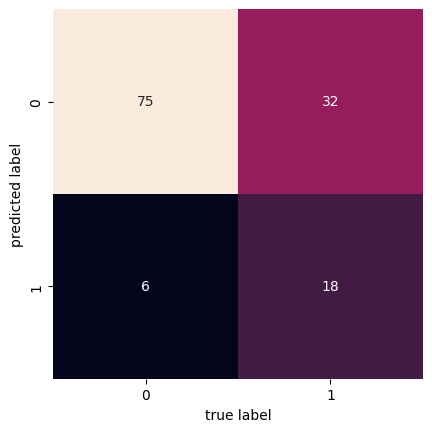

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('true label')
plt.ylabel('predicted label');

СЛУЧАЙ ЕСЛИ ПОЗИТИВ - ПРОФЕССОР

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
rs = recall_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
f1s = f1_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='professor')
print('precision score = {}'.format(ps))
print('recall score = {}'.format(rs))
print('F1 score = {}'.format(f1s.round(2)))

precision score = 0.75
recall score = 0.36
F1 score = 0.49


In [ ]:
Tprof = mat[1][1]
Tass = mat[0][0]
Fprof = mat[0][1]
Fass = mat[1][0]
#специфичность
Tass / (Tass + Fprof)

0.9259259259259259

СЛУЧАЙ ЕСЛИ ПОЗИТИВ - ДОЦЕНТ

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
rs = recall_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
f1s = f1_score(y, y_pred, labels = ['associate professor', 'professor'],  pos_label='associate professor')
print('precision score = {}'.format(ps))
print('recall score = {}'.format(rs))
print('F1 score = {}'.format(f1s.round(2)))

precision score = 0.7009345794392523
recall score = 0.9259259259259259
F1 score = 0.8


In [ ]:
#специфичность
Tprof / (Tprof + Fass)

0.36